#SVC_Regression

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import make_regression
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [ ]:
X

array([[ 0.36132197, -0.72277567],
       [ 0.6667538 ,  0.65223592],
       [ 0.17415384, -1.11036621],
       ...,
       [-0.80399982,  0.02415065],
       [-1.49079346,  1.04689955],
       [ 0.70808796,  1.20630393]])

In [ ]:
y

array([-5.56622984e+00,  3.04964802e+01, -2.55260161e+01, -4.29474599e+01,
       -5.45561055e+01, -1.34092179e+01, -4.42310699e+01,  9.58035322e-01,
       -4.02647870e+01,  2.01878339e+01,  1.72380222e+01,  2.09114899e+01,
        2.60229442e+00, -7.06595251e+01, -5.72196772e+01,  1.59644959e+00,
        7.45649019e+00,  2.37634331e+01,  3.66841963e-01,  2.58742047e+00,
       -1.51093573e+01,  2.12895913e+01,  9.01874745e+00,  1.38875488e+01,
       -2.41055010e+01,  4.42861219e-01,  4.81060635e+01, -2.18152448e+01,
       -2.53794642e+01,  1.43206042e+01, -4.15312356e+01,  4.57880301e+01,
        5.89818446e+00,  9.83943479e+00,  2.30152623e+00,  2.51385094e+01,
       -2.58238294e+01,  4.79381543e+01,  1.59840231e+00,  8.86977880e-01,
       -1.30071145e+01, -1.47396073e+01,  2.23455386e-01,  3.67021083e+01,
        4.33011795e+01, -3.38480829e+01,  1.00902999e+02,  2.44090146e+01,
       -3.04863074e+00, -3.15050865e+01, -5.67084633e+01,  5.31252041e+01,
       -3.74301679e+01, -

In [ ]:
pd.DataFrame(X)[0]

0      0.361322
1      0.666754
2      0.174154
3     -1.982874
4     -0.863150
         ...   
995    1.180645
996   -1.059921
997   -0.804000
998   -1.490793
999    0.708088
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

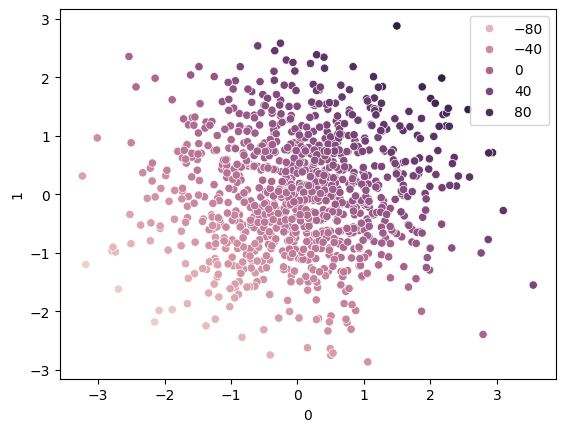

In [ ]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(750, 2) (750,)
(250, 2) (250,)


In [ ]:
from sklearn.svm import SVR
svr=SVR(kernel='linear')
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [ ]:
svr.coef_

array([[22.29280865, 25.46730065]])

In [ ]:
y_pred=svr.predict(X_test)
y_pred

array([-1.04269937e+01,  1.21592542e+01,  6.31173787e+01, -3.24145580e+01,
        2.87020658e+01, -2.67122512e+01,  5.68981974e+00, -4.06005891e+01,
        4.32582145e+01,  3.85134049e+01, -3.56156109e+01,  1.06057286e+01,
       -1.43308466e+01, -3.78077492e+00,  2.88060989e+01, -1.83743209e+00,
        1.62235922e+01,  1.43550196e+01, -5.06870469e+01, -3.15886761e+01,
        1.25432416e+01,  1.22468452e+01,  4.12728718e+01, -2.32845714e+01,
       -5.45686573e+00,  5.51976340e+01,  1.03907154e+01,  1.99582881e+01,
        2.06600776e+01,  4.62619337e+01, -1.93544495e+01,  3.61509103e+01,
       -5.32463664e+01, -5.20297909e+01,  4.34237772e+01,  2.02806791e+01,
        5.57748100e+01, -5.73054644e+01,  5.11838574e+00, -1.17650424e+01,
       -4.26297406e+01, -3.95331272e+01, -3.93560869e+01, -2.15605981e+01,
       -2.82386992e+01,  4.98271059e+01,  4.12478260e+01,  1.87051295e+01,
       -6.48455941e+01, -3.49635761e+01, -4.01455406e+01,  1.02520062e+01,
       -1.83363845e+01,  

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_pred,y_test))

0.9924440517160337


In [ ]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV
parameter={
    'C':[0.1,1,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['linear'],
    }

grid=GridSearchCV(svr,param_grid=parameter,refit=True,cv=5,verbose=3)
grid.fit(X_train,y_train)
grid.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.989 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.987 total time=   0.1s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.990 total time=   0.1s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.986 total time=   0.1s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.985 total time=   0.1s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.989 total time=   0.1s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.987 total time=   0.1s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.990 total time=   0.1s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.986 total time=   0.1s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.985 total time=   0.1s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.989 total time=   0.1s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

{'C': 1000, 'gamma': 1, 'kernel': 'linear'}

In [ ]:
y_pred=grid.predict(X_test)
print(r2_score(y_test,y_pred))

0.9924401094265849
